In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
cols = ['id', 'diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv('wdbc.data', names=cols)
pd.set_option('display.max_columns', None)

In [93]:
df = df.drop('id', axis=1)
df.columns

Index(['diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [94]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
df['result'] = df['diagnosis']
df = df.drop('diagnosis', axis=1)
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'result'],
      dtype='object')

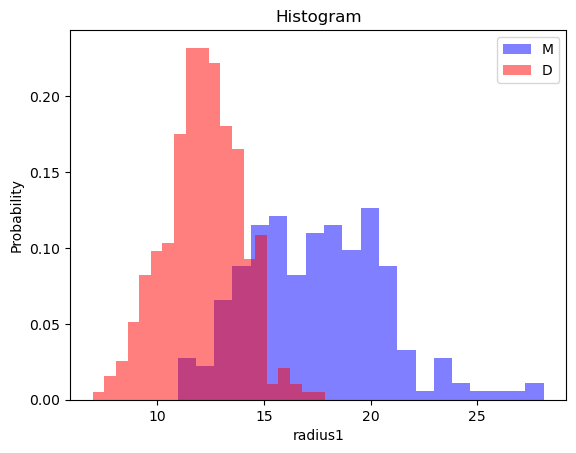

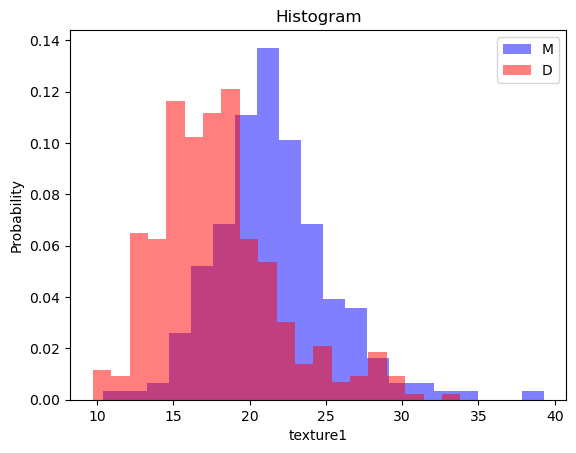

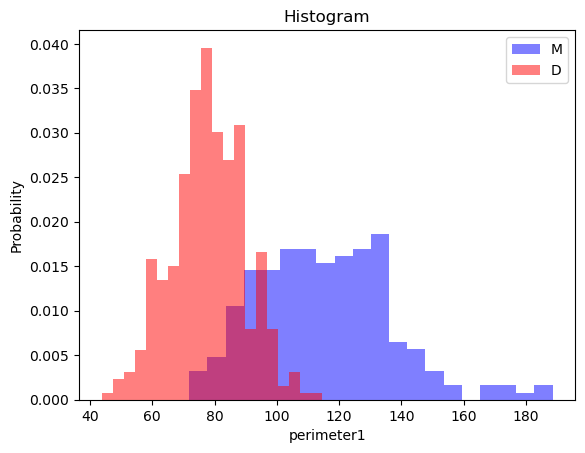

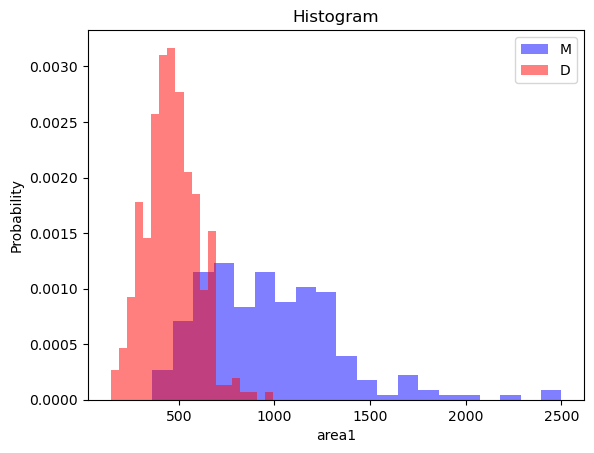

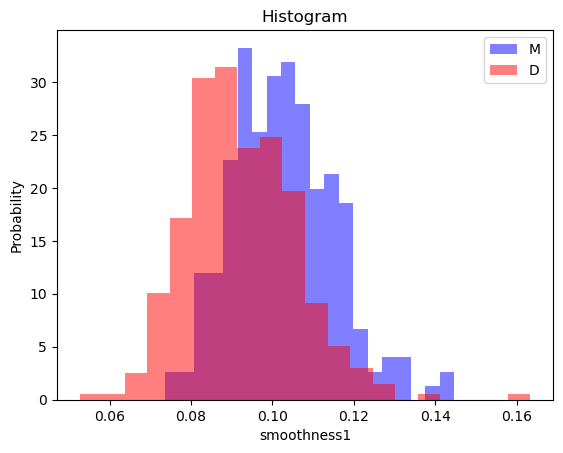

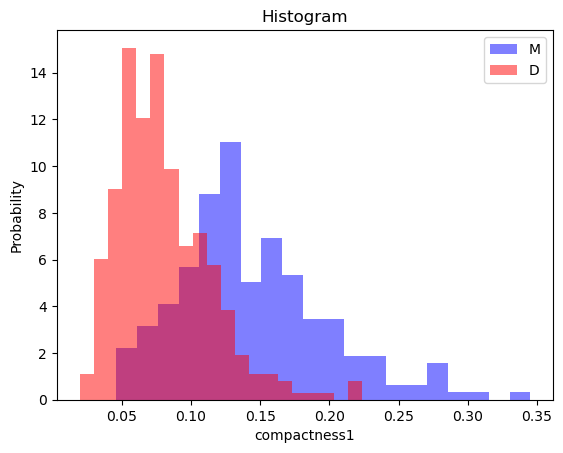

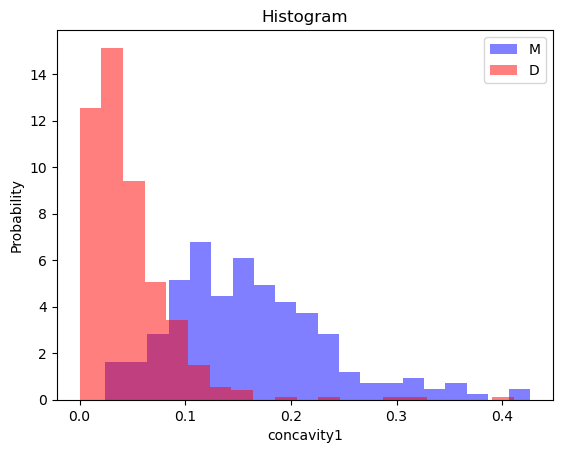

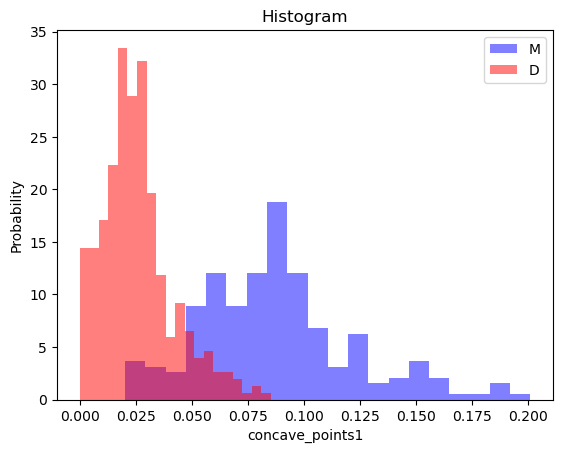

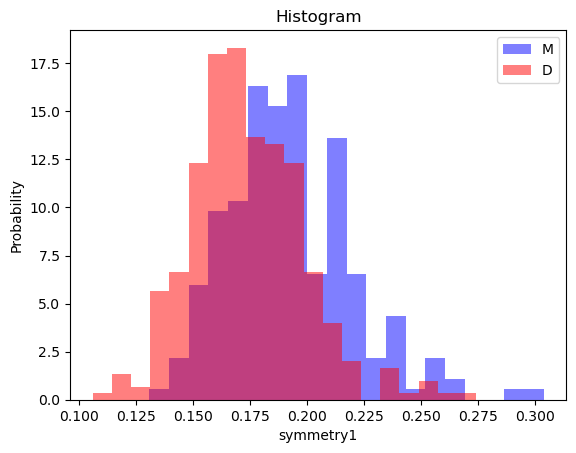

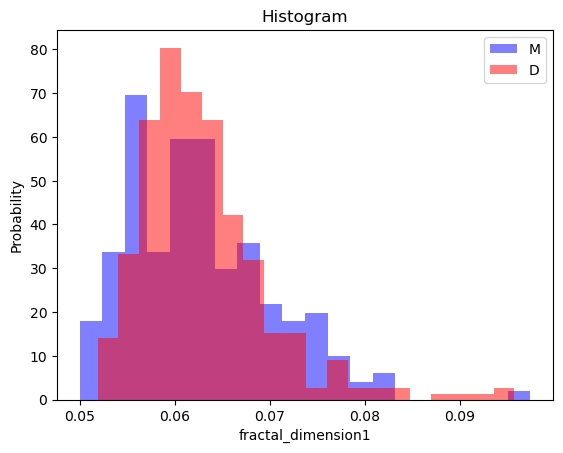

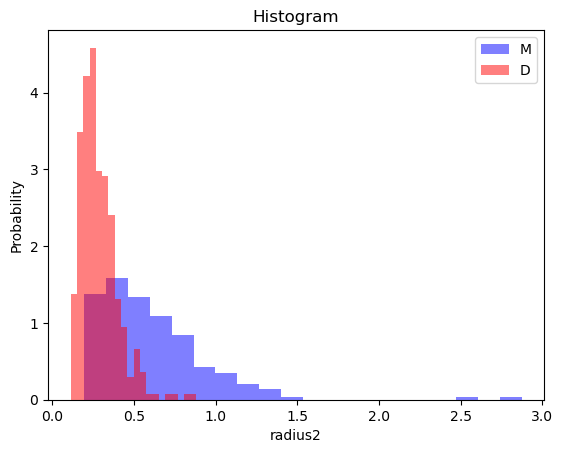

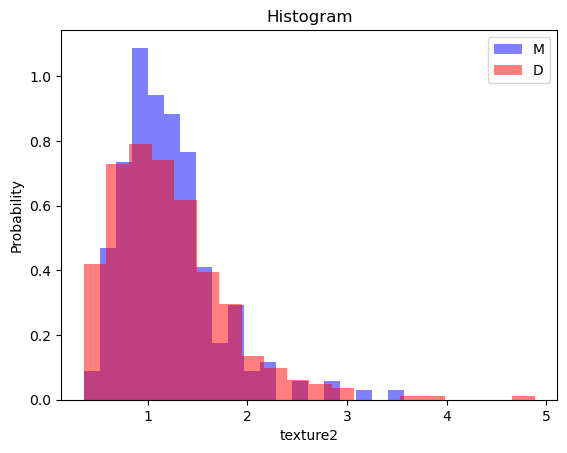

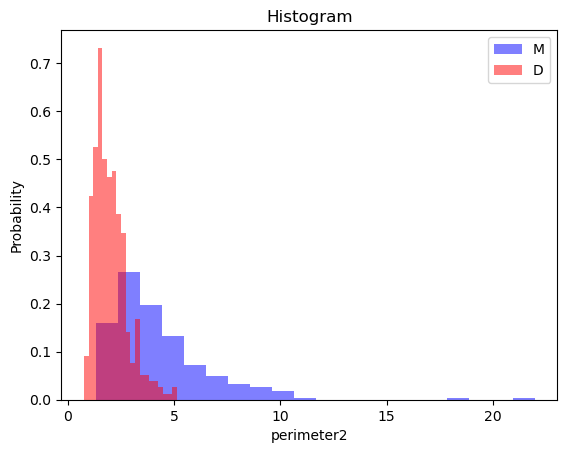

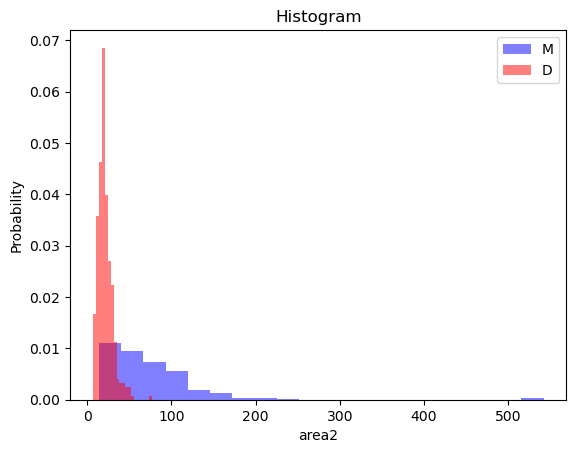

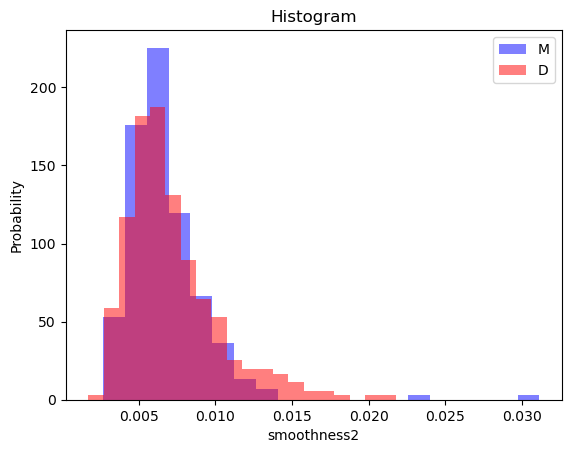

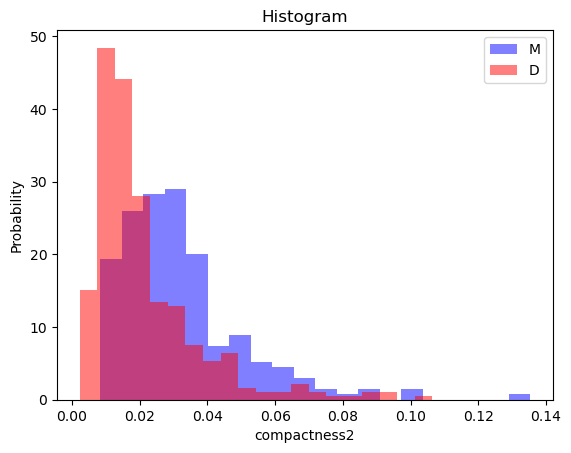

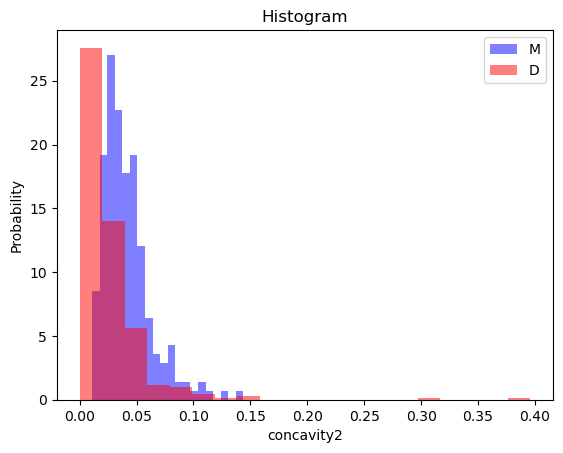

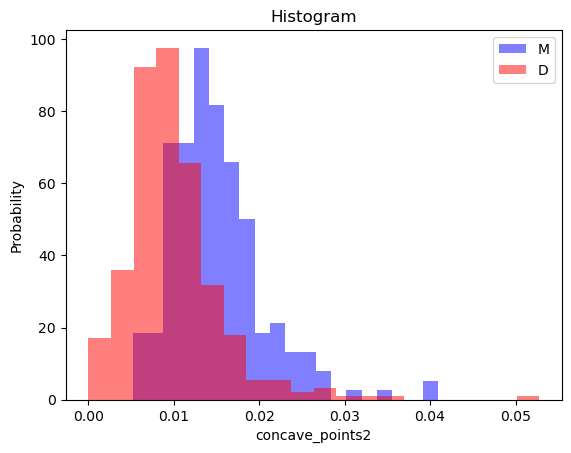

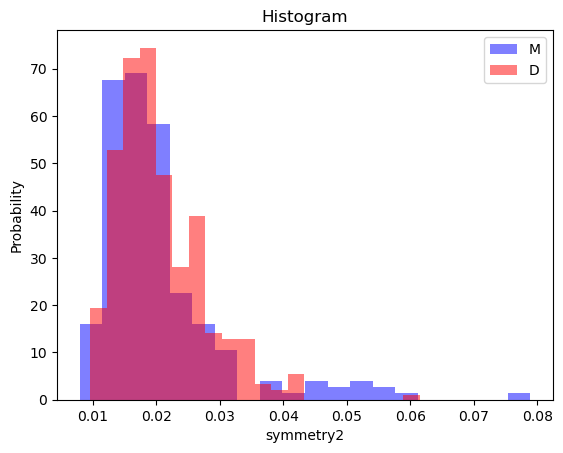

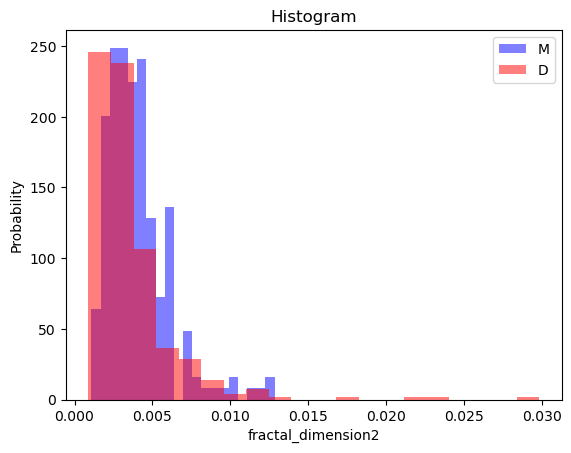

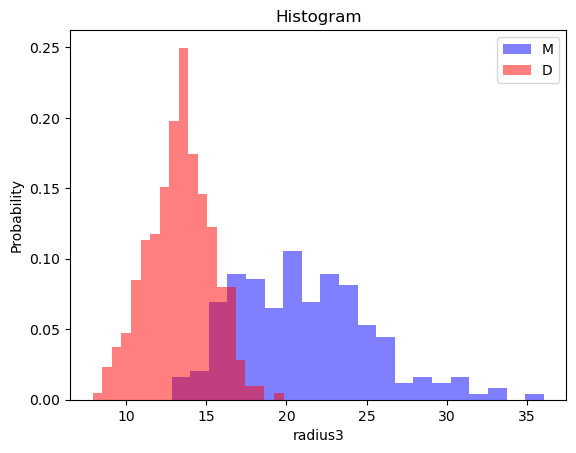

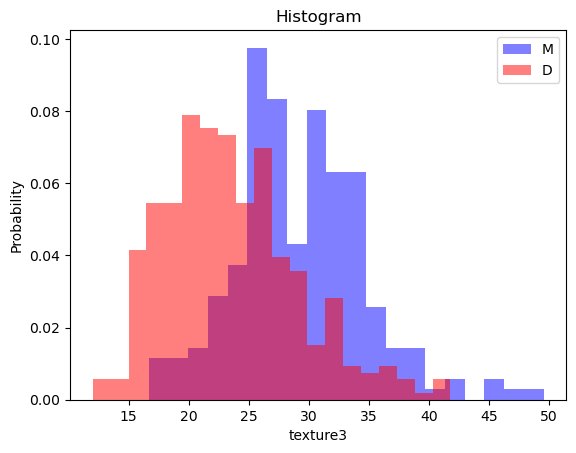

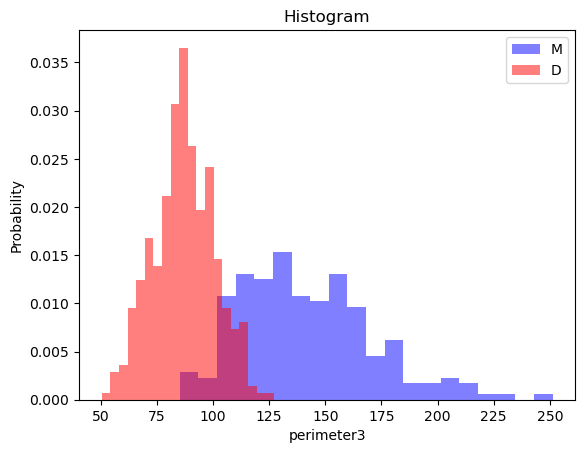

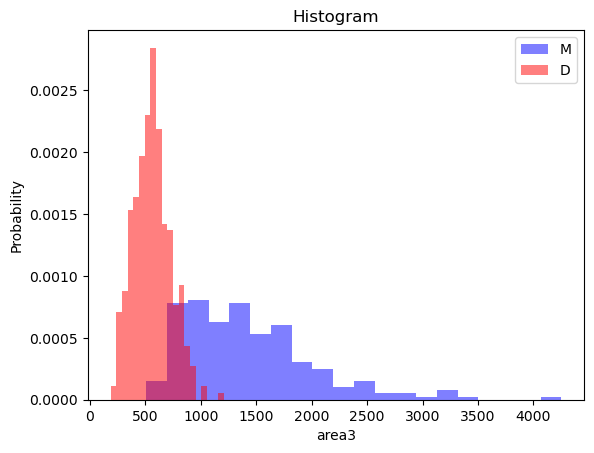

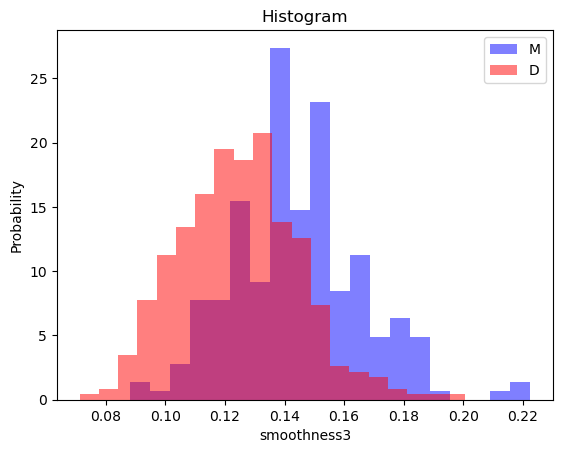

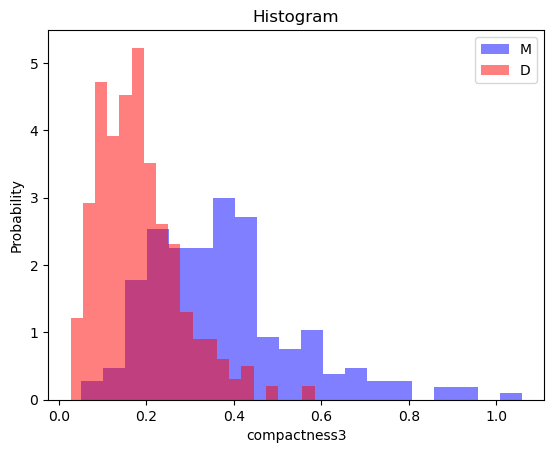

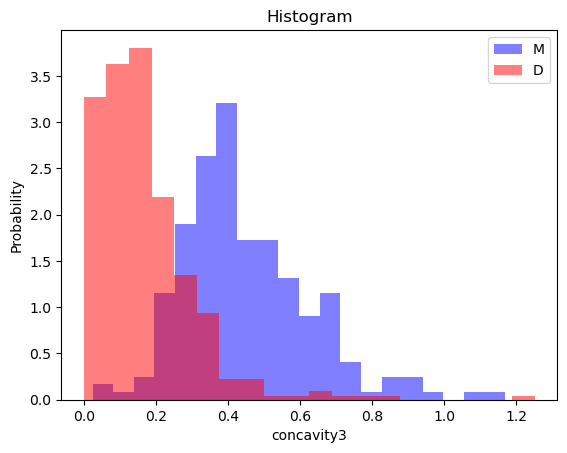

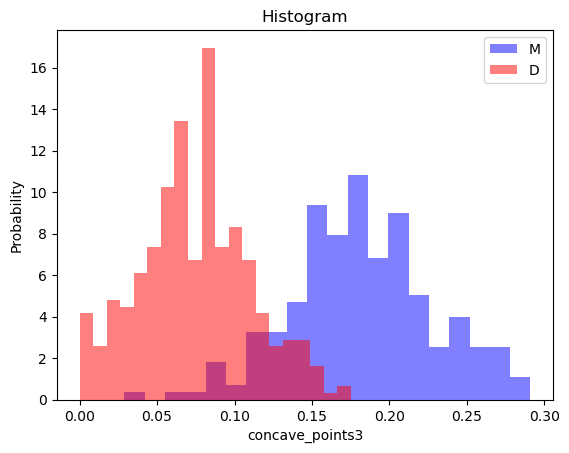

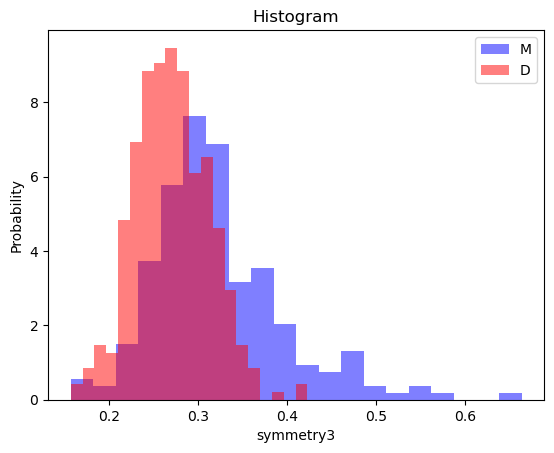

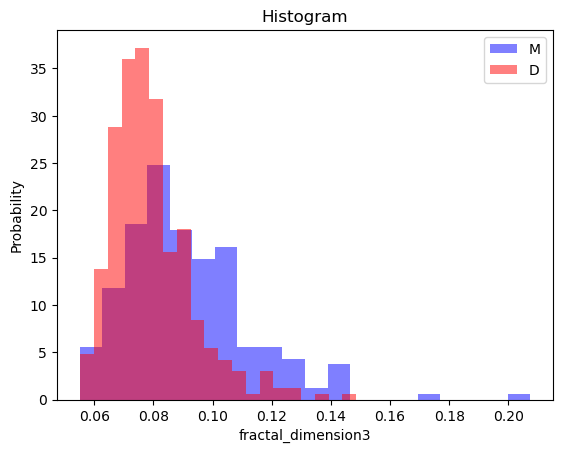

In [96]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['result'] == 1][label], color='blue', density=True, label='M', alpha=0.5, bins=20)
    plt.hist(df[df['result'] == 0][label], color='red', density=True, label='D', alpha=0.5, bins=20)
    plt.title('Histogram')
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show();

In [97]:
X = df.drop('result', axis = 1).values
y = df['result'].values

In [98]:
X.shape, y.shape

((569, 30), (569,))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=0)

In [114]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [115]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [116]:
model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 750us/step - loss: 88.3304 - accuracy: 0.6233


[88.33035278320312, 0.6233062148094177]

In [117]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 858us/step - loss: 80.9514 - accuracy: 0.6350


[80.95138549804688, 0.6349999904632568]

In [118]:
model.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
12/12 [==============================] - 0s 994us/step - loss: 34.1128 - accuracy: 0.5854
Epoch 2/200
12/12 [==============================] - 0s 962us/step - loss: 15.1788 - accuracy: 0.3713
Epoch 3/200
12/12 [==============================] - 0s 875us/step - loss: 6.7722 - accuracy: 0.5203
Epoch 4/200
12/12 [==============================] - 0s 1ms/step - loss: 1.7309 - accuracy: 0.6748
Epoch 5/200
12/12 [==============================] - 0s 869us/step - loss: 0.4720 - accuracy: 0.8753
Epoch 6/200
12/12 [==============================] - 0s 962us/step - loss: 0.4277 - accuracy: 0.8835
Epoch 7/200
12/12 [==============================] - 0s 934us/step - loss: 0.3679 - accuracy: 0.8916
Epoch 8/200
12/12 [==============================] - 0s 860us/step - loss: 0.3491 - accuracy: 0.9214
Epoch 9/200
12/12 [==============================] - 0s 887us/step - loss: 0.3586 - accuracy: 0.8808
Epoch 10/200
12/12 [==============================] - 0s 898us/step - loss: 0.3240 - accura

In [119]:
y_hat = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [120]:
y_hat = [0 if y < 0.5 else 1 for y in y_hat]
print(f'The accuracy score by using an artifical neural net is {accuracy_score(y_test, y_hat) * 100}.')

The accuracy score by using an artifical neural net is 97.0.
